# Analytical Benchmarks - 1D Cartesian Linear

In [1]:
#import and initialisation
from sympy import *
import matplotlib.pyplot as plt
import numpy as np
init_printing()
%matplotlib inline

In [2]:
#define the symbols used in the derivation
x,rho,C1,Cx,gx,mu,tau, exx = symbols( 'x  rho C1 C_x g_x mu tau e_{xx}')
vx = symbols('v_x',function=True)
p = symbols('p',function=True)

Firstly, we define the continuity (mass conservation) equation and the momentum equation in 1D, as well as the 1D stress tensor ($\tau$):

In [3]:
def get_continuity_equation(vx,rho):
    return (1/vx)*Derivative(vx,x) + (1/rho)*diff(rho,x)

In [4]:
def get_tau():
    tau = 2*mu*Derivative(vx,x) - mu*Derivative(vx,x)*Rational(2,3)
    return tau

In [5]:
def get_momentum_equation(p):
    return -Derivative(p,x) + rho*gx + Derivative(tau,x).doit()

Next we prescibe the density profile, and then get the continuity equation:

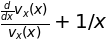

In [6]:
rho=x
continuity_equation = get_continuity_equation(vx(x),rho)
continuity_equation

(Note that equations in Sympy are implicitly equal to zero)

Then, we solve the continuity equation for the velocity:

In [7]:
velocity_equation = dsolve(continuity_equation)
velocity_equation

Now assign this equation to a new value for $v_x$, and replace the placeholder constant $C1$ with the more informative $C_x$:

In [8]:
vx = velocity_equation.rhs
vx = vx.subs(C1,Cx)
vx

Next, we obtain the stress tensor $\tau$:

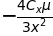

In [9]:
tau=get_tau()
tau.doit()

Then, we obtain the momentum equation:

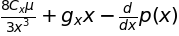

In [10]:
momentum_equation = get_momentum_equation(p(x))
momentum_equation

Next, we solve this differential equation to give us an equation for the pressure:

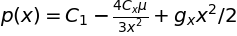

In [11]:
pressure_equation = dsolve(momentum_equation)
pressure_equation

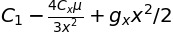

In [12]:
p = pressure_equation.rhs
p

We then perform two "sanity checks": we substitute the obtained equations into the continuity and momentum equations, which should then return zero:

In [13]:
get_momentum_equation(p).doit()

In [14]:
get_continuity_equation(vx,rho).doit()

Finally, we need to calculate the strain rate:

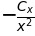

In [15]:
exx = Derivative(vx,x).doit()
exx

This gives us the following final equations for the velocity and pressure:

In [16]:
velocity_equation

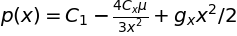

In [17]:
pressure_equation

In [18]:
phi = exx*tau 
phi.doit().subs(Cx,1).subs(mu,1)

# Plotting

Firstly, we need to generate functions from the above expressions for density, velocity and pressure:

In [19]:
density_function = lambdify(x,rho)

In [20]:
velocity_function = lambdify(x,vx.subs(Cx,1))

In [21]:
pressure_function = lambdify(x,p.subs(C1,0).subs(Cx,1).subs(gx,1).subs(mu,1))

In [22]:
exx_function = lambdify(x,exx.subs(Cx,1))

Now we need an x range to plot over:


In [23]:
x_plotting = np.arange(1,2,0.01)

Finally, we plot the density, velocity and pressure profiles:

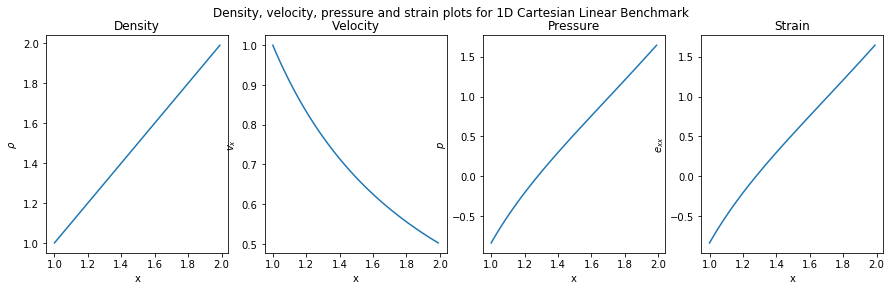

In [24]:
fig,axes = plt.subplots(1,4,figsize=(15,4))

axes[0].plot(x_plotting,density_function(x_plotting))
axes[0].set_xlabel("x")
axes[0].set_ylabel(r"$\rho$")
axes[0].set_title("Density")

axes[1].plot(x_plotting,velocity_function(x_plotting))
axes[1].set_xlabel("x")
axes[1].set_ylabel("$v_x$")
axes[1].set_title("Velocity")

axes[2].plot(x_plotting,pressure_function(x_plotting))
axes[2].set_xlabel("x")
axes[2].set_ylabel("$p$")
axes[2].set_title("Pressure")

axes[3].plot(x_plotting,pressure_function(x_plotting))
axes[3].set_xlabel("x")
axes[3].set_ylabel("$e_{xx}$")
axes[3].set_title("Strain")

fig.suptitle("Density, velocity, pressure and strain plots for 1D Cartesian Linear Benchmark")

In [25]:
fig.savefig("1DCartesianLinear.pdf")